Data Preprcessing for Braille Model

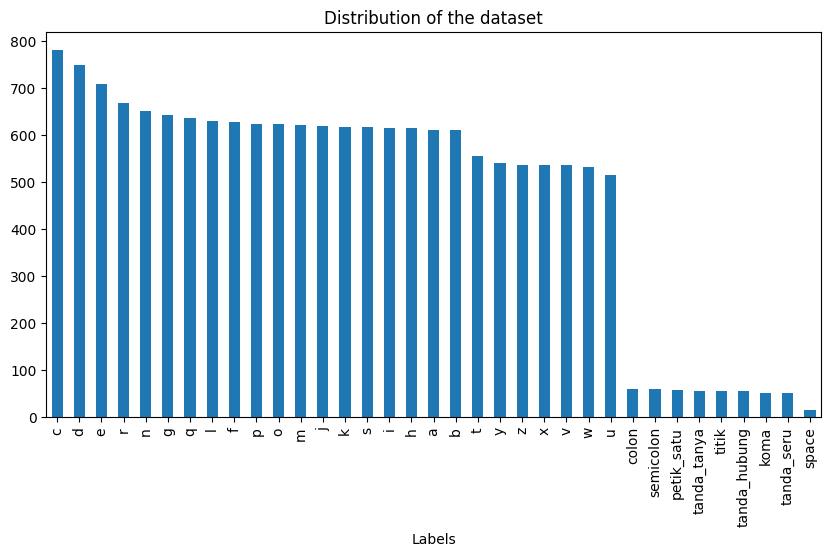

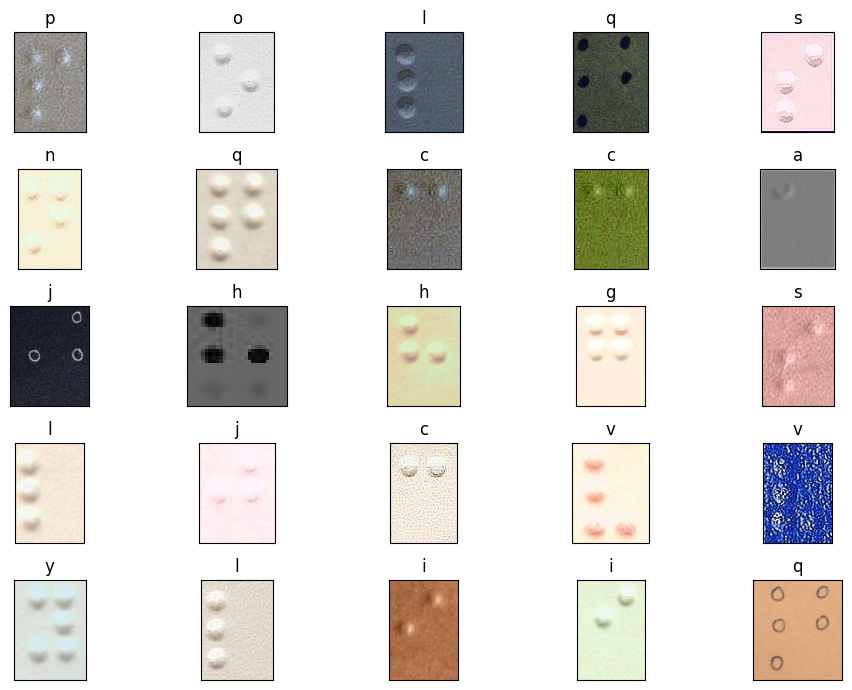

In [6]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
%run preprocessing.ipynb

In [7]:
#Shuffle
# Separate in train and test data
braille_train_df, braille_validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [9]:
#data generator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
                                   
braille_train_data = train_datagen.flow_from_dataframe(dataframe=braille_train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(150,100),
                                         batch_size=64,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

braille_validasi_data = val_datagen.flow_from_dataframe(dataframe=braille_validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(150,100),
                                         batch_size=16,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 10520 validated image filenames belonging to 35 classes.
Found 3288 validated image filenames belonging to 35 classes.


In [10]:
# Load the trained model
braille_model = load_model(r'D:\astungkara\cnn_braille.h5')

pred = braille_model.predict(braille_validasi_data)
pred_classes = np.argmax(pred,axis=1)
pred_proba = np.max(pred, axis=1)

# Map the label
labels = (braille_train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_classes = [labels[k] for k in pred_classes]

# Display the result
print(f'The first 15 predictions: {pred_classes[:15]}')

206/206 [==============================] - 36s 175ms/step
The first 15 predictions: ['titik', 'b', 'n', 'o', 'r', 'a', 'a', 'titik', 'y', 'a', 'x', 'r', 'i', 'a', 'l']


C:\Users\USER\AppData\Local\Temp\ipykernel_19392\930523098.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = braille_model.predict_generator(braille_validasi_data)


Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

           a       0.97      0.99      0.98       134
           b       1.00      0.99      1.00       125
           c       1.00      0.99      0.99       148
       colon       1.00      1.00      1.00        16
           d       1.00      1.00      1.00       143
           e       0.97      0.98      0.97       138
           f       0.98      0.98      0.98       113
           g       0.99      0.99      0.99       136
           h       0.99      0.98      0.99       126
           i       0.99      0.95      0.97       107
           j       0.99      0.97      0.98       145
           k       0.81      0.97      0.89       107
        koma       1.00      1.00      1.00        12
           l       0.98      0.98      0.98       131
           m       0.99      0.97      0.98       108
           n       0.93      0.97      0.95       122
           o  

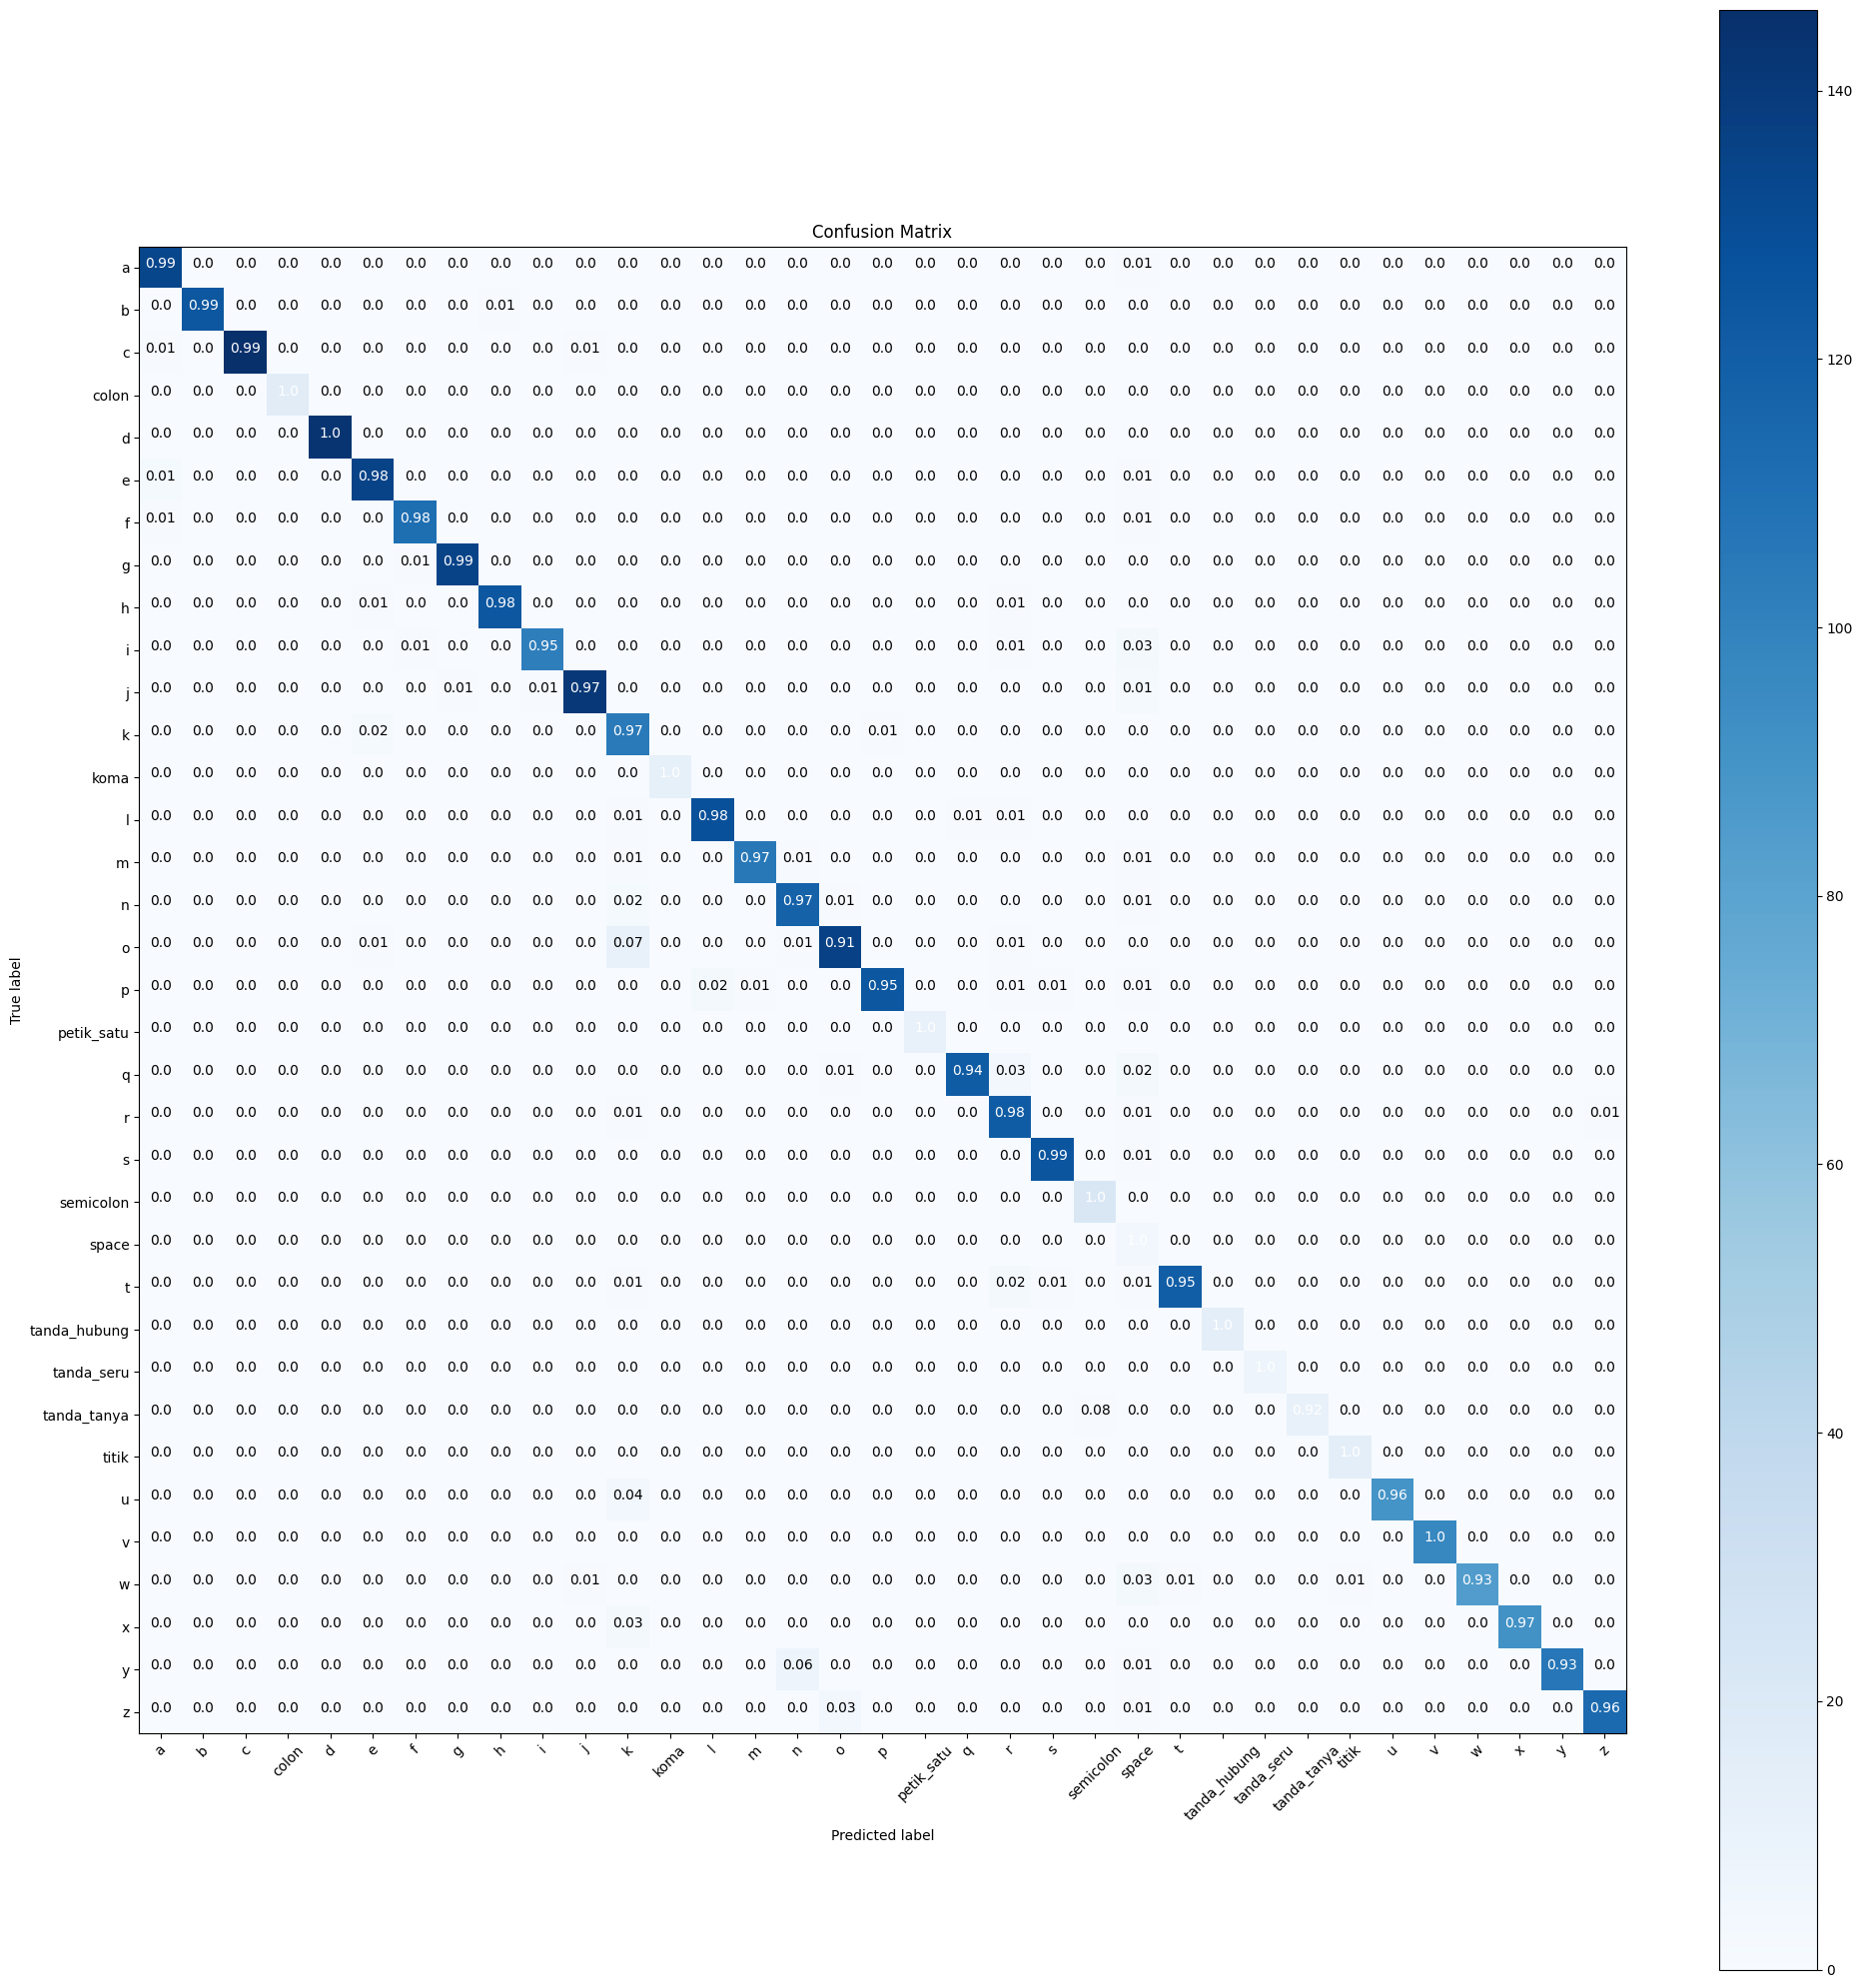

In [11]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False

target_names = []
for key in braille_validasi_data.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix 

Y_pred = braille_model.predict_generator(braille_validasi_data)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(braille_validasi_data.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(braille_validasi_data.classes, y_pred, target_names=target_names))

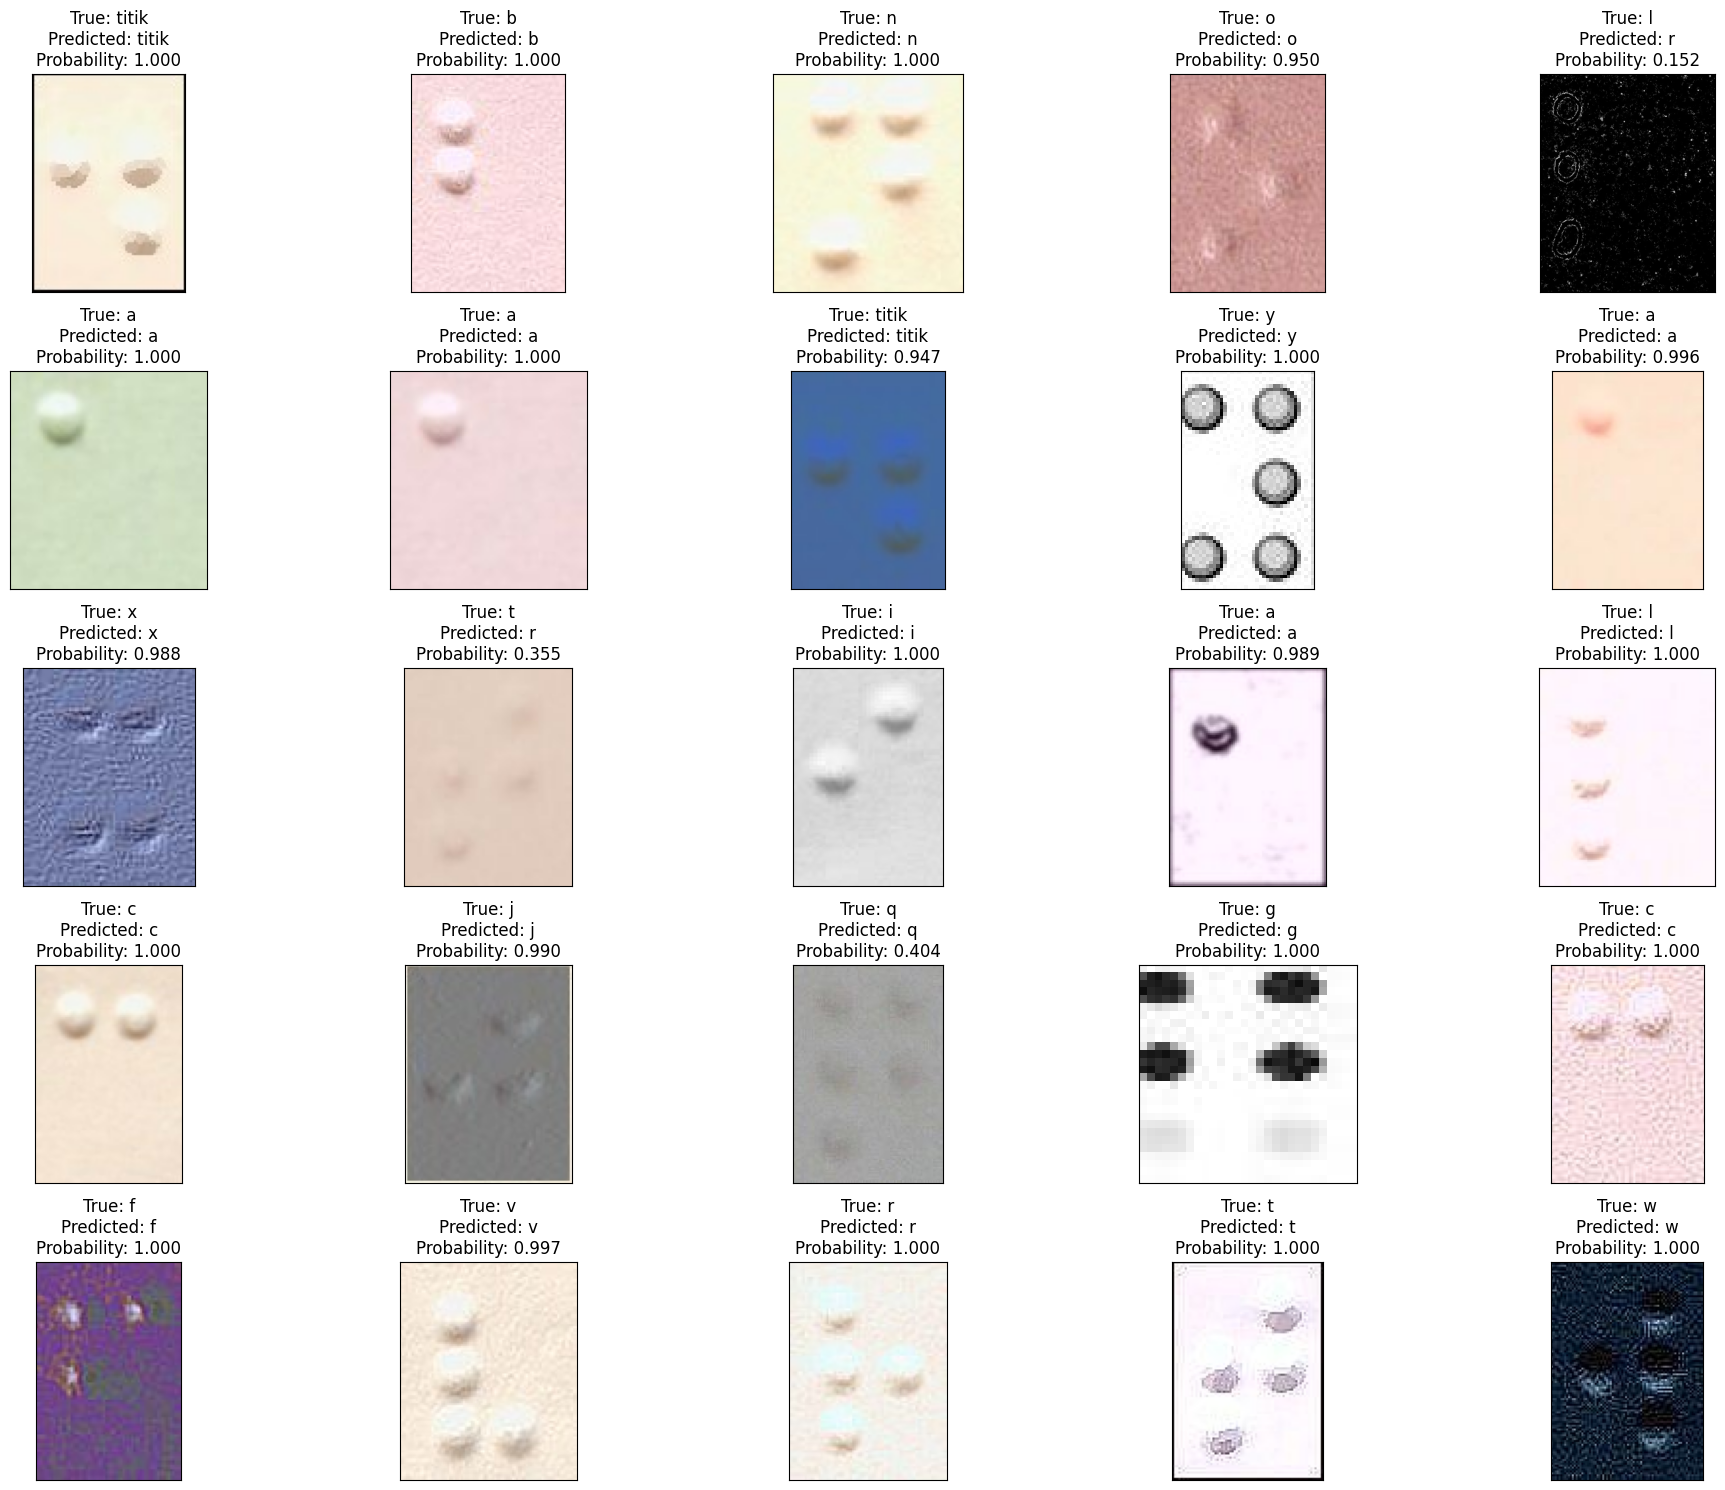

In [12]:
# Display the result
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(braille_validasi_df.Filepath.iloc[i]))
    ax.set_title(f"True: {braille_validasi_df.Label.iloc[i]}\nPredicted: {pred_classes[i]}\nProbability: {pred_proba[i]:.3f}")
plt.tight_layout()
plt.show()